In [1]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import callbacks
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
source_dir = '/content/drive/MyDrive/_SKRIPSI/dataset_final'
dest_dir = '/content/dataset_final'

if not os.path.exists(dest_dir):
    shutil.copytree(source_dir, dest_dir)

data_dir = dest_dir
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 3864 images belonging to 4 classes.
Found 39 images belonging to 4 classes.
Found 43 images belonging to 4 classes.


In [6]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [7]:
base_model.output

<KerasTensor shape=(None, 7, 7, 512), dtype=float32, sparse=False, name=keras_tensor_18>

In [8]:
head_model = base_model.output
head_model = Flatten()(head_model)
head_model = Dense(1024, activation='relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(1024, activation='relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(4, activation='softmax')(head_model)

In [9]:
model = Model(inputs=base_model.input, outputs=head_model)

In [10]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         4,10

 Total params: 41,459,524 (158.16 MB)

 Trainable params: 26,744,836 (102.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [11]:
# Compile Model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss',
                                         patience=5,
                                         restore_best_weights=True,
                                         start_from_epoch=20)

In [13]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


121/121 ━━━━━━━━━━━━━━━━━━━━ 49s 287ms/step - accuracy: 0.5483 - loss: 39.8308 - val_accuracy: 0.8974 - val_loss: 0.3051
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 20s 169ms/step - accuracy: 0.8702 - loss: 0.3465 - val_accuracy: 0.9231 - val_loss: 0.2709
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 41s 173ms/step - accuracy: 0.9051 - loss: 0.2715 - val_accuracy: 0.8974 - val_loss: 0.2333
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 21s 177ms/step - accuracy: 0.9215 - loss: 0.2336 - val_accuracy: 0.8718 - val_loss: 0.3053
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 22s 184ms/step - accuracy: 0.8921 - loss: 0.2814 - val_accuracy: 0.9487 - val_loss: 0.1602
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 22s 185ms/step - accuracy: 0.9013 - loss: 0.2918 - val_accuracy: 0.9487 - val_loss: 0.1782
Epoch 7/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 22s 181ms/step - accuracy: 0.8717 - loss: 0.3882 - val_accuracy: 0.8974 - val_loss: 0.4796
Epoch 8/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 22s 181ms/step - accuracy: 0.8026 - loss: 0.5905 - va

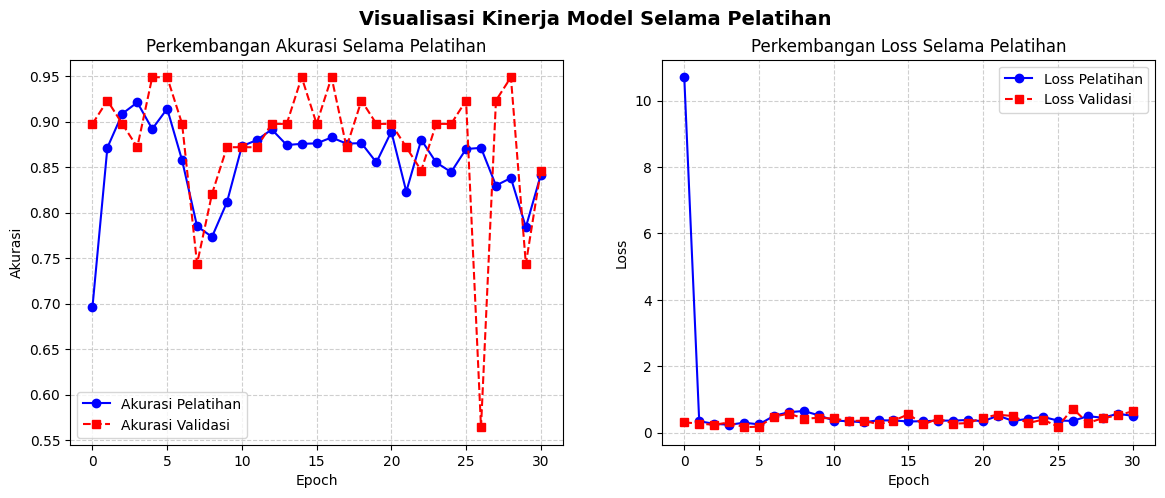

In [14]:
plt.figure(figsize=(14, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='o', linestyle='-', color='blue', label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], marker='s', linestyle='--', color='red', label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.title('Perkembangan Akurasi Selama Pelatihan')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='o', linestyle='-', color='blue', label='Loss Pelatihan')
plt.plot(history.history['val_loss'], marker='s', linestyle='--', color='red', label='Loss Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Perkembangan Loss Selama Pelatihan')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Visualisasi Kinerja Model Selama Pelatihan', fontsize=14, fontweight='bold')
plt.show()

In [15]:
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)
labels = list(test_generator.class_indices.keys())

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 6s/step


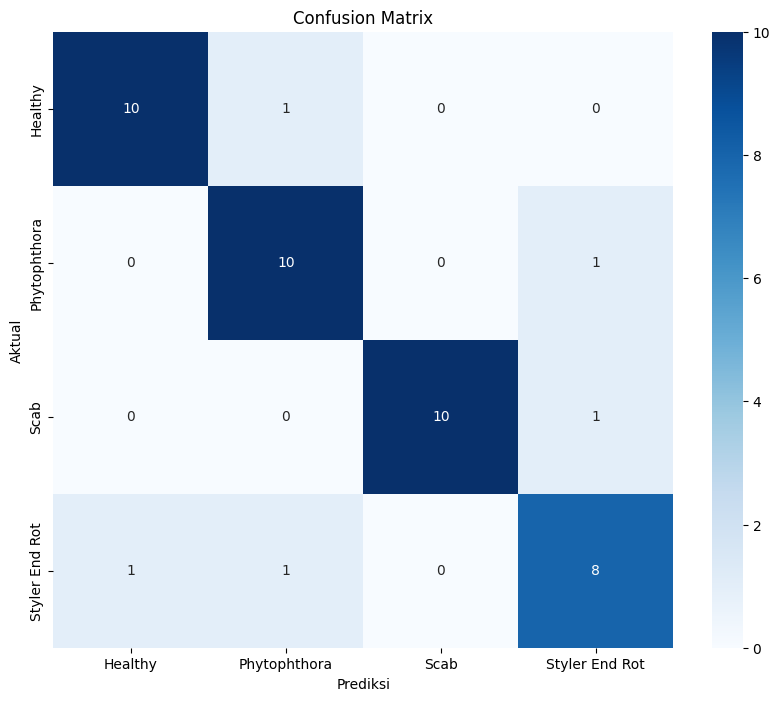

In [16]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))

Classification Report:
                precision    recall  f1-score   support

       Healthy       0.91      0.91      0.91        11
  Phytophthora       0.83      0.91      0.87        11
          Scab       1.00      0.91      0.95        11
Styler End Rot       0.80      0.80      0.80        10

      accuracy                           0.88        43
     macro avg       0.89      0.88      0.88        43
  weighted avg       0.89      0.88      0.88        43



In [19]:
model.save("adam_001_02.keras")